## Part 8 - Decision Tree and Random Forest

### Modèle - Decision Tree 

In [240]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [241]:
# Import dataset
dataset = pd.read_csv("dataset_CV_labelise.csv", delimiter = ";")

In [242]:
dataset.head()

,CV_Sentences,Sentences_CV_clean,CV_Number,Sentence_line,Nb_tokens,%texte_lu,%texte_lu_fin_ligne,Is_alpha,Grammar,Label
0,SELMA LAFKIR CORDE 80 CODEUSE ENTHOUSIASTE,SELMA LAFKIR CORDE 80 CODEUSE ENTHOUSIASTE,CV_1,0.0,6.0,2.80,97.20,"[True, True, True, False, True, True]","['NOUN', 'PROPN', 'VERB', 'NUM', 'PROPN', 'PRO...",1
1,PROFIL,PROFIL,CV_1,1.0,1.0,3.27,96.73,[True],['NOUN'],0
2,PERSONNEL Je suis étudiante au lycée Condorcet.,PERSONNEL Je suis étudiante au lycée Condorcet.,CV_1,2.0,8.0,7.01,92.99,"[True, True, True, True, True, True, True, False]","['NOUN', 'PRON', 'AUX', 'ADJ', 'ADP', 'NOUN', ...",0
3,Je code depuis l'âge de 13 ans et j'aime créer...,Je code depuis l'âge de 13 ans et j'aime créer...,CV_1,3.0,24.0,18.22,81.78,"[True, True, True, False, True, True, False, T...","['PRON', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', ...",0
4,RÉALISATIONS,RÉALISATIONS,CV_1,4.0,1.0,18.69,81.31,[True],['NOUN'],0


In [243]:
dataset.shape

(4049, 10)

In [244]:
data_desc = dataset.describe(include='all')
display(data_desc)

,CV_Sentences,Sentences_CV_clean,CV_Number,Sentence_line,Nb_tokens,%texte_lu,%texte_lu_fin_ligne,Is_alpha,Grammar,Label
count,4049,4045,4047,4047.000000,4047.000000,4047.000000,4047.000000,4047,4047,4049.000000
unique,2829,2825,145,NaN,NaN,NaN,NaN,1251,2058,NaN
top,#NOM?,#NOM?,CV_10,NaN,NaN,NaN,NaN,[False],['NOUN'],NaN
freq,131,131,66,NaN,NaN,NaN,NaN,463,249,NaN
mean,NaN,NaN,NaN,15.822090,9.097850,50.400032,49.599970,NaN,NaN,0.040257
std,NaN,NaN,NaN,11.372538,10.625067,30.183407,30.183408,NaN,NaN,0.196585
min,NaN,NaN,NaN,0.000000,1.000000,0.240000,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,7.000000,2.000000,24.310000,23.635000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,14.000000,5.000000,49.760000,50.240000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,23.000000,12.000000,76.365000,75.690000,NaN,NaN,0.000000


In [245]:
display(100*dataset.isnull().sum()/dataset.shape[0])

CV_Sentences           0.000000
Sentences_CV_clean     0.098790
CV_Number              0.049395
Sentence_line          0.049395
Nb_tokens              0.049395
%texte_lu              0.049395
%texte_lu_fin_ligne    0.049395
Is_alpha               0.049395
Grammar                0.049395
Label                  0.000000
dtype: float64

## Preprocessing

1. Separate target variable Y from features X

In [246]:
dataset["Label"].unique()

array([1, 0])

In [247]:
dataset = dataset.loc[(dataset['CV_Sentences'] != "#NOM?"),:]

In [248]:
dataset.shape

(3918, 10)

In [249]:
dataset = dataset.loc[(dataset['CV_Sentences'] != ":"),:]

In [250]:
dataset.shape

(3914, 10)

In [251]:
dataset = dataset.dropna(axis =0, how = 'any')

In [252]:
dataset.shape

(3910, 10)

In [253]:
display(100*dataset.isnull().sum()/dataset.shape[0])

CV_Sentences           0.0
Sentences_CV_clean     0.0
CV_Number              0.0
Sentence_line          0.0
Nb_tokens              0.0
%texte_lu              0.0
%texte_lu_fin_ligne    0.0
Is_alpha               0.0
Grammar                0.0
Label                  0.0
dtype: float64

In [254]:
print("Separating labels from features...")
col_list = ['CV_Sentences',"Sentences_CV_clean","CV_Number", "Is_alpha", "Grammar", "Label"]

X = dataset.drop(col_list, axis = 1)
y = dataset.loc[:,target_variable]

print('y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
y : 
66    0.0
67    0.0
68    0.0
69    1.0
70    0.0
Name: Label, dtype: float64

X :
   Sentence_line  Nb_tokens  %texte_lu  %texte_lu_fin_ligne
0            0.0        6.0       2.80                97.20
1            1.0        1.0       3.27                96.73
2            2.0        8.0       7.01                92.99
3            3.0       24.0      18.22                81.78
4            4.0        1.0      18.69                81.31


In [255]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Sentence_line', 'Nb_tokens', '%texte_lu', '%texte_lu_fin_ligne']
Found categorical features  []


In [256]:
# Divide dataset Train set & Test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [257]:
# Create pipeline for numeric features
numeric_transformer = SimpleImputer(strategy='mean')

In [258]:
# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first')

In [259]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [260]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(y_train.head())
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
print("...Done")
print(y_train[0:5])

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()
# Label encoding
print("Encoding labels...")
print(y_test[0:5])
y_test = encoder.transform(y_test)
print("...Done")
print(y_test[0:5])

Performing preprocessings on train set...
...Done.
[[30.   14.   71.21 28.79]
 [ 7.    3.   18.79 81.21]
 [18.    6.   64.72 35.28]
 [ 4.    8.   16.33 83.67]
 [16.   11.   62.45 37.55]]

Encoding labels...
3850    0
3266    0
2152    0
2902    0
1551    0
Name: Label, dtype: int64
...Done
[0 0 0 0 0]
Performing preprocessings on test set...
      Sentence_line  Nb_tokens  %texte_lu  %texte_lu_fin_ligne
3376           21.0        3.0      59.93                40.07
1726           11.0        5.0      54.21                45.79
1787           31.0        2.0      67.30                32.70
1790           34.0        1.0      71.75                28.25
125            17.0        6.0      87.67                12.33
...Done.
[[21.    3.   59.93 40.07]
 [11.    5.   54.21 45.79]
 [31.    2.   67.3  32.7 ]
 [34.    1.   71.75 28.25]
 [17.    6.   87.67 12.33]]

Encoding labels...
3376    0
1726    0
1787    0
1790    0
125     0
Name: Label, dtype: int64
...Done
[0 0 0 0 0]


## Application de la DECISION TREE

In [261]:
# Perform grid search
print("Grid search...") 
classifier = DecisionTreeClassifier()

# Grid of values to be tested
params = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8]
}
gridsearch = GridSearchCV(classifier, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best validation accuracy :  0.9702685361202152


In [262]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(y_train_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on training set...")
y_train_proba = gridsearch.predict_proba(X_train)
print("...Done.")
print(y_train_proba)
print()

Predictions on training set...
...Done.
[0 0 0 ... 0 0 0]

Probabilities on training set...
...Done.
[[0.99176513 0.00823487]
 [0.99176513 0.00823487]
 [0.99176513 0.00823487]
 ...
 [0.99176513 0.00823487]
 [0.99176513 0.00823487]
 [0.84158416 0.15841584]]



In [263]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(y_test_pred)
print()

# It's also possible to get the probabilities estimated by the model:
print("Probabilities on test set...")
y_test_proba = gridsearch.predict_proba(X_test)
print("...Done.")
print(y_test_proba)
print()

Predictions on test set...
...Done.
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

In [264]:
# Print scores
print("accuracy on training set : ", accuracy_score(y_train, y_train_pred))
print("accuracy on test set : ", accuracy_score(y_test, y_test_pred))
print()

print("f1-score on training set : ", f1_score(y_train, y_train_pred))
print("f1-score on test set : ", f1_score(y_test, y_test_pred))
print()

accuracy on training set :  0.9757033248081841
accuracy on test set :  0.9757033248081841

f1-score on training set :  0.6576576576576576
f1-score on test set :  0.6545454545454545



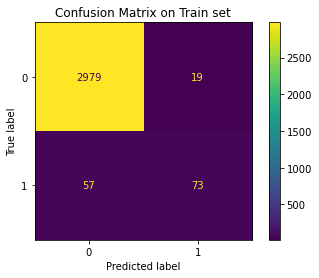

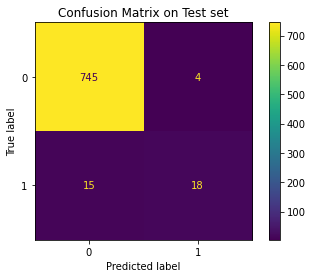

In [265]:
# Visualize confusion matrices
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gridsearch, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

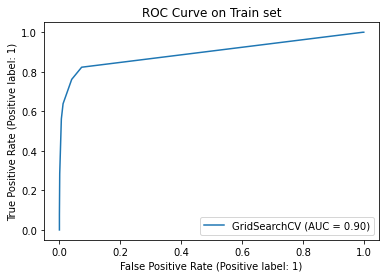

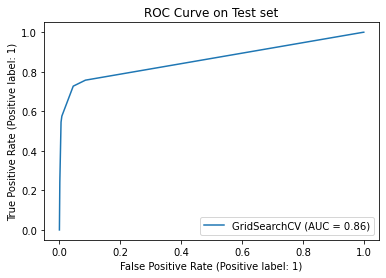

In [266]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_train, y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(gridsearch, X_test, y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show() 

## Application de la RANDOM FOREST